Qual deve ser o estoque enviado para a loja com R$ 75.000,00 a ser investido em marketing?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# carregando arquivo XLSX e exibindo os primeiros registros
base = pd.read_excel('Investimento_x_Venda.xlsx')
base.head()

,Investimento em marketing,Venda Qtd
0,20,118
1,25,142
2,40,225
3,52,260
4,67,295


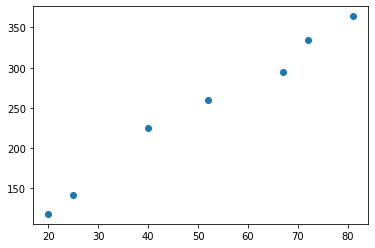

In [4]:
# visualizando as informações graficamente
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])
plt.show()

Podemos perceber que temos um relacionamento linear entre as duas variáveis,
quando o investimento em marketing cresce, as vendas crescem de forma diretamente proporcional.

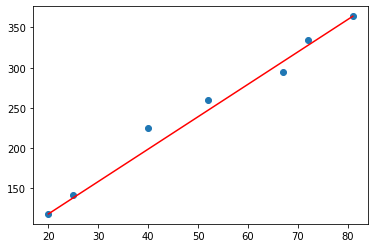

In [7]:
# traçando uma reta pelo primeiro e último pontos
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])

x0 = base['Investimento em marketing'][0]
y0 = base['Venda Qtd'][0]
x1 = base['Investimento em marketing'][6]
y1 = base['Venda Qtd'][6]

plt.plot([x0, x1], [y0, y1], 'r')
plt.show()

In [10]:
# usando a equação da reta para determinar a venda (y=ax+b)
def encontrarY(x_reta, y_reta, x):
  a = (y_reta[1] - y_reta[0]) / (x_reta[1] - x_reta[0])
  b = y_reta[1] - a * x_reta[1]
  y = a * x + b
  return y

In [13]:
encontrarY([x0, x1], [y0, y1], 75)

339.8032786885246

Ou seja, para R$ 75.000,00 investidos em marketing, teremos que ter aproximadamente 340 mil unidades em estoque

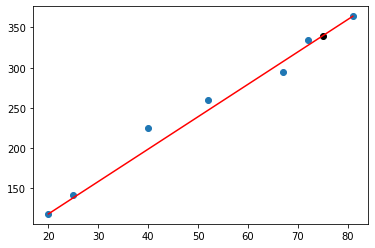

In [14]:
# indicando este número no gráfico
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])
plt.scatter(75, encontrarY([x0, x1], [y0, y1], 75), color='k')

x0 = base['Investimento em marketing'][0]
y0 = base['Venda Qtd'][0]
x1 = base['Investimento em marketing'][6]
y1 = base['Venda Qtd'][6]

plt.plot([x0, x1], [y0, y1], 'r')
plt.show()

Usando Machine Learning para descobrir a venda

In [15]:
from sklearn import linear_model

In [16]:
reg = linear_model.LinearRegression()

In [17]:
reg.fit(base['Investimento em marketing'].values.reshape(-1, 1), base['Venda Qtd'])

LinearRegression()

In [18]:
# coeficiente angular da reta
reg.coef_

array([3.90643623])

In [19]:
# coeficiente linear
reg.intercept_

49.200323514387804

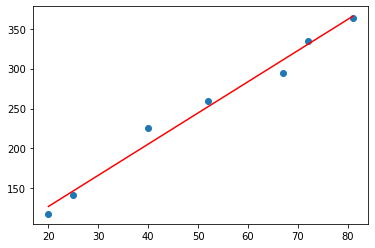

In [20]:
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])

x = np.array(base['Investimento em marketing'])
y = reg.intercept_ + x * reg.coef_

plt.plot(x, y, 'r')
plt.show()

In [21]:
reg.predict([[75]])

array([342.18304104])

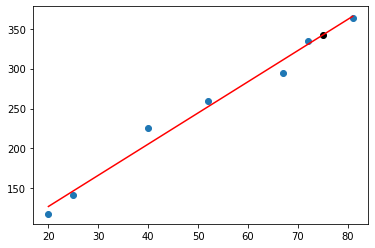

In [22]:
plt.scatter(base['Investimento em marketing'], base['Venda Qtd'])
plt.scatter(75, reg.predict([[75]])[0], color='k')

x = np.array(base['Investimento em marketing'])
y = reg.intercept_ + x * reg.coef_

plt.plot(x, y, 'r')
plt.show()